In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split 

torch.manual_seed(42) 

x = np.linspace(-3, 3, 100) 
y = 2 * x + 1 + np.random.normal(0, 0.5, size=x.shape)

y[::10] += np.random.normal(10, 5, size=(10,))

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor=torch.tensor(y, dtype=torch.float32).unsqueeze(1)

x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2)

model = nn.Linear(1, 1)

In [2]:
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01) 

epochs = 1000
model.eval()
for epoch in range(epochs): 
    model.train()
    optimizer.zero_grad()
    output=model(x_tensor)
    loss = criterion(output,y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1)%100 == 0:
        print("Epoch: ", epoch+1, "Loss: ", loss.item())

model.eval()
with torch.no_grad(): 
    predictions = model(x_tensor).squeeze().numpy()

Epoch:  100 Loss:  1.059058427810669
Epoch:  200 Loss:  0.9125328063964844
Epoch:  300 Loss:  0.9124668836593628
Epoch:  400 Loss:  0.9124668836593628
Epoch:  500 Loss:  0.9124668836593628
Epoch:  600 Loss:  0.9124668836593628
Epoch:  700 Loss:  0.9124668836593628
Epoch:  800 Loss:  0.9124668836593628
Epoch:  900 Loss:  0.9124668836593628
Epoch:  1000 Loss:  0.9124668836593628


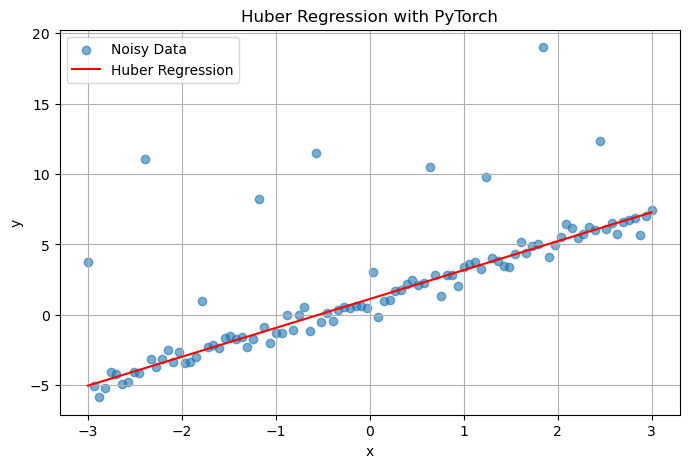

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Noisy Data", alpha=0.6)
plt.plot(x, predictions, color='red', label="Huber Regression")
plt.title("Huber Regression with PyTorch")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

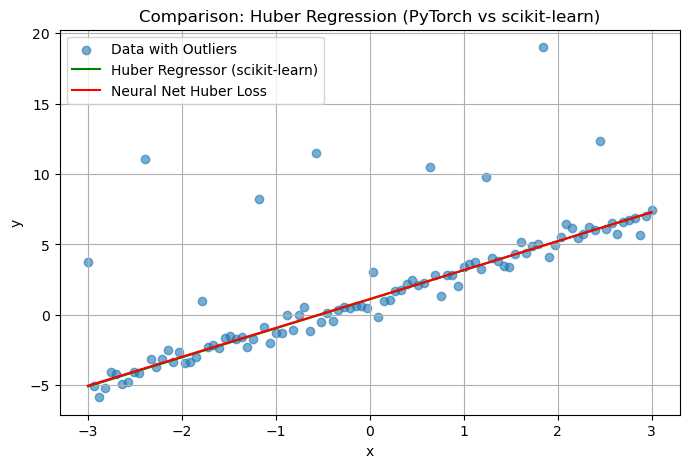

In [4]:
from sklearn.linear_model import HuberRegressor

huber_model = HuberRegressor()

huber_model.fit(x.reshape(-1, 1), y)

y_huber_pred = huber_model.predict(x.reshape(-1, 1))

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Data with Outliers", alpha=0.6)
plt.plot(x, y_huber_pred, color='green', label="Huber Regressor (scikit-learn)")
plt.plot(x, predictions, color='red', label="Neural Net Huber Loss")
plt.title("Comparison: Huber Regression (PyTorch vs scikit-learn)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()